# *Import Whale data using Kaggle API*

*   캐글 API를 이용해 코랩 내 데이터 불러오기



In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [3]:
# Get the latest version of Kaggle
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle
# !pip install kaggle==1.5.6

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 2.1 MB 4.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=e50106de8e0bc20d90d4ec12b4e1508ab686f93912e80bd88e8d33dfe1d6a3e7
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [ ]:
# import the Kaggle API
from google.colab import files
files.upload()

In [ ]:
ls -1ha kaggle.json

In [ ]:
# Check if you're well connected to your kaggle ID

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

# # 본인이 참가한 모든 대회 보기 
!kaggle competitions list

In [ ]:
# Competition Data Download
! kaggle competitions download -c happy-whale-and-dolphin

In [ ]:
# Extract All the zipfiles and remove them
!unzip '*.zip'
!rm *.zip

In [ ]:
# Check where you are
# !pwd

# Check the file lists at the current directory ('/content')
!ls '/content'

# *Load data & EDA*


*   학습데이터 불러오기
*   EDA를 통한 데이터 확인



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from collections import Counter, defaultdict
# from PIL import Image
import os
import io
from pathlib import Path

In [ ]:
import pandas as pd

# Check out the info of training set
train_csv = pd.read_csv('train.csv', encoding='utf-8')
print(train_csv.shape)
train_csv.head(10)

In [ ]:
import pandas as pd

sample = pd.read_csv('sample_submission.csv', encoding='utf-8')
sample.shape
sample.head(10)

image                                        predictions
0  000110707af0ba.jpg  37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
1  0006287ec424cb.jpg  37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
2  000809ecb2ccad.jpg  37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
3  00098d1376dab2.jpg  37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
4  000b8d89c738bd.jpg  37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
5  000e246888710c.jpg  37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
6  000eb6e73a31a5.jpg  37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
7  000fe6ebfc9893.jpg  37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
8  0011f7a65044e4.jpg  37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
9  0012ff300032e3.jpg  37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...

In [ ]:
# check out the target label: 'individual_id'
# label the nonexistent data as 'new_individual'
sample_1 = sample['predictions'][0].split(' ')
print(sample_1, '\n')

# an image list of a specific individual, '37c7aba965a5'
train_csv[train_csv['individual_id'] == sample_1[0]]

['37c7aba965a5', '114207cab555', 'a6e325d8e924', '19fbb960f07d', 'new_individual'] 



image      species individual_id
48     0046ceef89b3fc.jpg  minke_whale  37c7aba965a5
62     005e53b1b6aada.jpg  minke_whale  37c7aba965a5
174    0106d276033b78.jpg  minke_whale  37c7aba965a5
226    014ba64e8ce8ec.jpg  minke_whale  37c7aba965a5
253    01637f0b588ed8.jpg  minke_whale  37c7aba965a5
...                   ...          ...           ...
50006  fac55ca7d54b1f.jpg  minke_whale  37c7aba965a5
50301  fc55728208d315.jpg  minke_whale  37c7aba965a5
50373  fca53e45c649d7.jpg  minke_whale  37c7aba965a5
50468  fd20e39ea4eb03.jpg  minke_whale  37c7aba965a5
50760  feb3392c8ee510.jpg  minke_whale  37c7aba965a5

[400 rows x 3 columns]

In [ ]:
# # Display a random image
# path = './train_images/005e53b1b6aada.jpg'

# with open(path, 'rb') as f:
#     data = f.read()

# data_io = io.BytesIO(data)
# img = Image.open(data_io)

# print('height, width: ', img.size)

# # find number of channels
# if np.array(img).ndim == 2:
#     channels = 1
#     print("image has 1 channel")
# else:
#     channels = np.array(img).shape[-1]
#     print("image has", channels, "channels")

# img = img.resize((500,300)) # resize the image
# display(img)

In [ ]:
class Highlight:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(Highlight.BOLD+'Number of Species :'+Highlight.END, train_csv['species'].nunique())
print(Highlight.BOLD+'Number of Individuals :'+Highlight.END, train_csv['individual_id'].nunique())
print(Highlight.BOLD+'Number of Images :'+Highlight.END, train_csv['image'].nunique(), '\n')

print(Highlight.BOLD+'Number of Nulls :'+Highlight.END) # 0 Nulls
print(train_csv.isna().sum(), '\n')

print(train_csv.shape)

Number of Species : 30
Number of Individuals : 15587
Number of Images : 51033 

Number of Nulls :
image            0
species          0
individual_id    0
dtype: int64 

(51033, 3)


*Species of Whales (Quite close to one another if they're in the same species)* 

bottlenose_dolphin           9664
beluga                       7443
humpback_whale               7392
blue_whale                   4830
false_killer_whale           3326
dusky_dolphin                3139
spinner_dolphin              1700
melon_headed_whale           1689
minke_whale                  1608
killer_whale                 1493
fin_whale                    1324
gray_whale                   1123
bottlenose_dolpin            1117
kiler_whale                   962
southern_right_whale          866
spotted_dolphin               490
sei_whale                     428
short_finned_pilot_whale      367
common_dolphin                347
cuviers_beaked_whale          341
pilot_whale                   262
long_finned_pilot_whale       238
white_sided_dolphin           229
brydes_whale                  154
pantropic_spotted_dolphin     145
globis                        116
commersons_dolphin             90
pygmy_killer_whale             76
rough_toothed_dolphin          60
frasiers_dolph

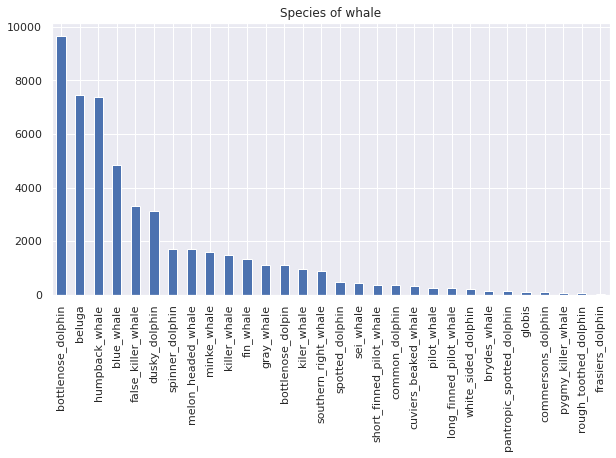

In [ ]:
# Count the num of species and Visualize it with bar chart

counts_species = train_csv['species'].value_counts()
print(counts_species, '\n\n')
counts_species.plot(kind='bar', figsize=(10,5), title='Species of whale')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from collections import Counter, defaultdict
from PIL import Image
import os
import io
from pathlib import Path
import cv2

In [ ]:
#-*- coding:utf-8 -*-
import os

def show_images(article_ids, dir, cols=1, rows=-1):
    if isinstance(article_ids, int) or isinstance(article_ids, str):
        article_ids = [article_ids]
    article_count = len(article_ids)
    if rows < 0: rows = (article_count // cols) + 1
    plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
    for i in range(article_count):
        article_id = str(article_ids[i])
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        # plt.title(article_id)
        try:
            # path = os.path.join('./', dir, article_id)
            # image = cv2.imread(path, cv2.IMREAD_COLOR)
            image = cv2.imread(f'./{dir}/{article_id}', cv2.IMREAD_COLOR)
            img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            img_rgb = cv2.resize(img_rgb, (200,200), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
            plt.imshow(img_rgb)
            plt.title(article_id)
            plt.tight_layout(pad=0.8, h_pad=0)
        except:
            pass

name of species:  blue_whale


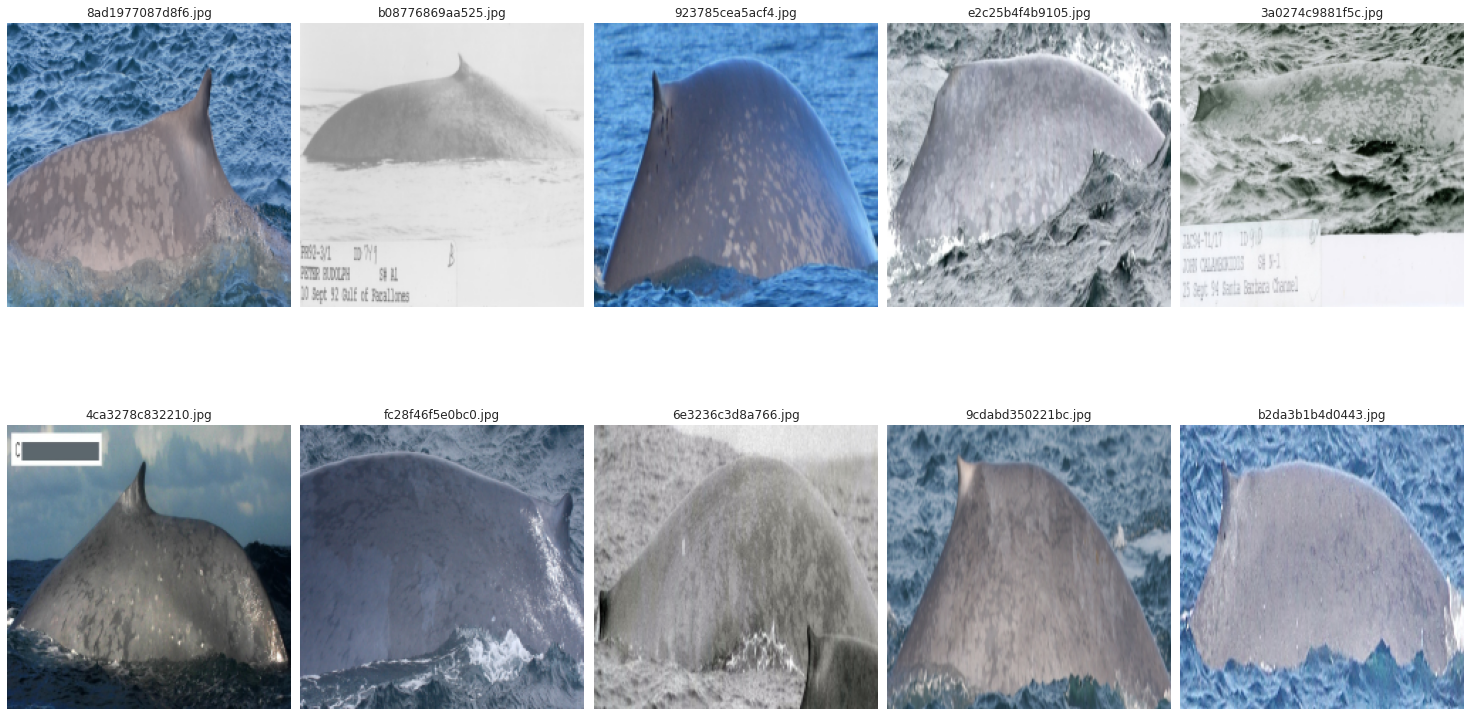

In [ ]:
import random

# train image samples
sample_species = counts_species.index[3]
print("name of species: ", sample_species)
jpg_species = random.sample(list(train_csv[train_csv['species'] == sample_species]['image']), 10)
show_images(jpg_species, 'train_images', 5)

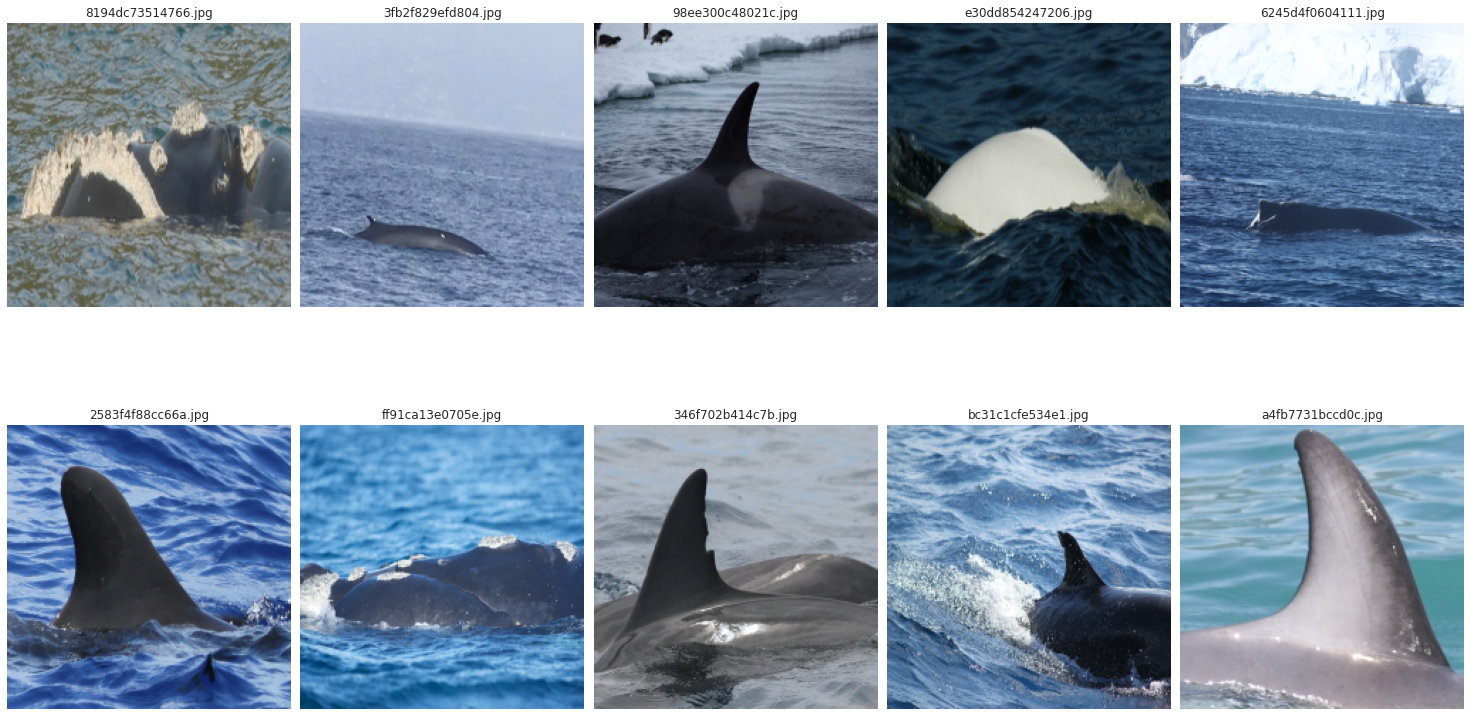

In [ ]:
# test image samples

jpg_test_species = random.sample(os.listdir('./test_images/'), 10)
show_images(jpg_test_species, 'test_images', 5)

In [ ]:
# #-*- coding:utf-8 -*-
# import os

# def show_new_images(article_ids, dir, cols=1, rows=-1):
#     if isinstance(article_ids, int) or isinstance(article_ids, str):
#         article_ids = [article_ids]
#     article_count = len(article_ids)
#     if rows < 0: rows = (article_count // cols) + 1
#     plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
#     for i in range(article_count):
#         article_id = str(article_ids[i])
#         plt.subplot(rows, cols, i + 1)
#         plt.axis('off')
#         # plt.title(article_id)
#         try:
#             # path = os.path.join('./', dir, article_id)
#             # image = cv2.imread(path, cv2.IMREAD_COLOR)
#             image = cv2.imread(f'./{dir}/{article_id}', cv2.IMREAD_COLOR)
#             img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#             # img_rgb = cv2.resize(img_rgb, (200,200), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
#             plt.imshow(img_rgb)
#             plt.title(article_ids.index(article_id)+300)
#             plt.tight_layout(pad=0.8, h_pad=0)
#         except:
#             pass

# jpg_test = os.listdir('./test_images/')[300:400]
# show_new_images(jpg_test, 'test_images', 10)

# # 1000개 정도만 fin image 추출
# # [ 0, 5, 7, 13, 22, 24, 25, 27, 28, 29, 30, 32, 62, 64, 81, 83, 85, 86, 88, 96, 97,
# 109, 118, 122, 135, 136, 145, 147, 153, 167, 168, 177, 178, 179, 189, 191, 194,
# 208, 214, 218, 224, 225, 234, 242, 246, 254, 258, 262, 263, 276, 280, 284, 295,

*Individual Ids of Whales*

In [ ]:
# Count the num of species and Visualize it with bar chart

counts_id = train_csv['individual_id'].value_counts()
print(counts_id, '\n\n')
print(Highlight.BOLD+'Total number of Ids: '+Highlight.END, len(counts_id))
print(Highlight.BOLD+'Ids having under 5 shots (%): '+Highlight.END, round(len(counts_id[counts_id<5])/len(counts_id)*100, 2),'%')
print(Highlight.BOLD+'Ids having only 1 shot (%): '+Highlight.END, round(len(counts_id[counts_id==1])/len(counts_id)*100, 2),'%')

37c7aba965a5    400
114207cab555    168
a6e325d8e924    155
19fbb960f07d    154
c995c043c353    153
               ... 
7da30c559ad2      1
882c59ba34bb      1
704e724a033f      1
08983c540e76      1
bc6fcab946c4      1
Name: individual_id, Length: 15587, dtype: int64 


Total number of Ids:  15587
Ids having under 5 shots (%):  88.94 %
Ids having only 1 shot (%):  59.4 %


name of id:  114207cab555


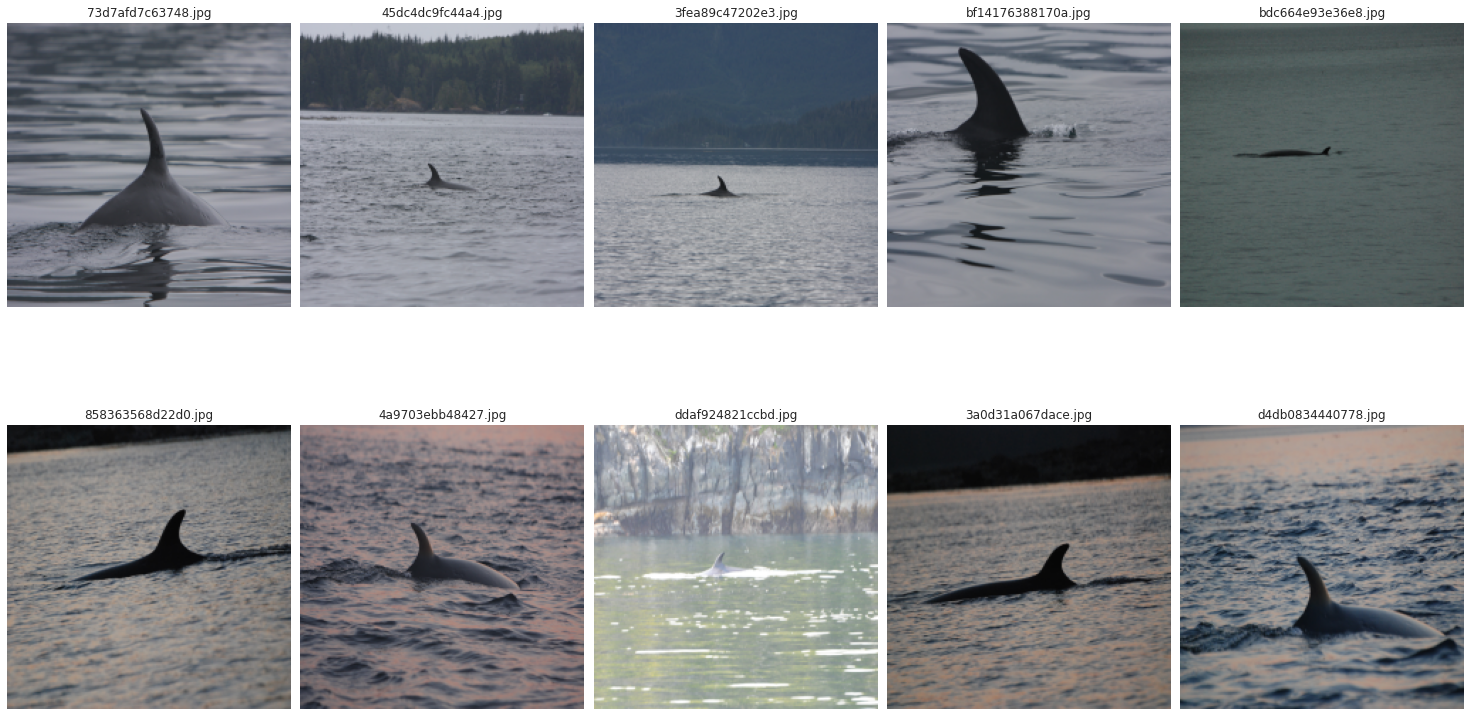

In [ ]:
sample_id = counts_id.index[1]
print("name of id: ",sample_id)
jpg_id = random.sample(list(train_csv[train_csv['individual_id'] == sample_id]['image']), 10)
show_images(jpg_id, 'train_images', 5)

**EDA 결론**

1. 데이터의 일관성확보 필요 (bounding box-crop)
2. one-shot learning 또는 data augmentation의 문제
3. 효과적인 OSR(open-set recognition)?

# *Object Detection Using yolov5*

*   yolov5를 이용한 backfin detection (bounding box)
: https://www.kaggle.com/code/jpbremer/backfin-detection-with-yolov5/notebook (참고)



In [ ]:
|!pip install -qU wandb
!pip install -qU bbox-utility # check https://github.com/awsaf49/bbox for source code
!pip install -q imagesize

In [ ]:
import numpy as np
from tqdm.notebook import tqdm

tqdm.pandas()
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import glob

import imagesize
import shutil

from joblib import Parallel, delayed

In [ ]:
import wandb

try:
    from kaggle_secrets import UserSecretsClient

    user_secrets = UserSecretsClient()
    api_key = user_secrets.get_secret("WANDB")
    wandb.login(key=api_key)
    anonymous = None
except:
    wandb.login(anonymous="must")
    print(
        "To use your W&B account,\nGo to Add-ons -> Secrets and provide your W&B access token. Use the Label name as WANDB. \nGet your W&B access token from here: https://wandb.ai/authorize"
    )

wandb: Currently logged in as: anony-mouse-249418 (use `wandb login --relogin` to force relogin)


To use your W&B account,
Go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as WANDB. 
Get your W&B access token from here: https://wandb.ai/authorize


In [ ]:
FOLD = 1  # which fold to train
DIM = 512
MODEL = "yolov5x"
BATCH = 32
EPOCHS = 25
OPTMIZER = "SGD"

PROJECT = "happywhale-det-public"  # w&b in yolov5
NAME = f"{MODEL}-dim{DIM}-fold{FOLD}_test01_allfin3"  # w&b for yolov5

ROOT_DIR = "/content"
IMAGE_DIR = "crop/images"  # directory to save images
LABEL_DIR = "crop/labels"  # directory to save labels

In [ ]:
import os

path = '/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/'
os.chdir(path)

!mkdir -p {IMAGE_DIR}
!mkdir -p {LABEL_DIR}

In [ ]:
# Train Data
df = pd.read_csv("backfin_annotations.csv")
df.columns = ["image_id", "x", "y", "w", "h"]
df["old_image_path"] = f"{ROOT_DIR}/train_images/" + df.image_id.astype(str)
df["image_path"] = f"{IMAGE_DIR}/" + df.image_id
df["label_path"] = f"{LABEL_DIR}/" + df.image_id.str.replace("jpg", "txt")
df.head(2)

image_id     x    y     w    h  \
0  00021adfb725ed.jpg     0  113   804  512   
1  000562241d384d.jpg  1625  552  1020  359   

                             old_image_path                      image_path  \
0  /content/train_images/00021adfb725ed.jpg  crop/images/00021adfb725ed.jpg   
1  /content/train_images/000562241d384d.jpg  crop/images/000562241d384d.jpg   

                       label_path  
0  crop/labels/00021adfb725ed.txt  
1  crop/labels/000562241d384d.txt

In [ ]:
def make_copy(row):
    shutil.copyfile(row.old_image_path, row.image_path)
    return

In [ ]:
image_paths = df.old_image_path.tolist()
_ = Parallel(n_jobs=-1, backend='threading')(delayed(make_copy)(row) for _, row in tqdm(df.iterrows(), total=len(df)))

  0%|          | 0/5201 [00:00<?, ?it/s]

FileNotFoundError: ignored

In [ ]:
# check https://github.com/awsaf49/bbox for source code of following utility functions
from bbox.utils import coco2yolo, coco2voc, voc2yolo, yolo2voc
from bbox.utils import draw_bboxes, load_image
from bbox.utils import clip_bbox, str2annot, annot2str

def get_bbox(annots):
    bboxes = [list(annot.values()) for annot in annots]
    return bboxes

def get_imgsize(row):
    row['width'], row['height'] = imagesize.get(row['image_path'])
    return row

np.random.seed(32)
colors = [(np.random.randint(255), np.random.randint(255), np.random.randint(255))\
          for idx in range(1)]

In [ ]:
def x2bbox(points):
    xmin, ymin, xmax, ymax = points.split(" ")#points.split(" ")points[:, 0].min(), points[:, 1].min(), points[:, 0].max(), points[:, 1].max()
    xmin, ymin,xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)
    xmax = xmin + xmax
    ymax = ymin + ymax
    return [[xmin, ymin, xmax, ymax]]

In [ ]:
df["bbox"] = df["x"].astype(str) + " " +  df["y"].astype(str) + " " + df["w"].astype(str) + " " + df["h"].astype(str)
df['bbox'] = df.bbox.map(x2bbox)

In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision'

In [ ]:
df = df.progress_apply(get_imgsize, axis=1)
display(df.head(2))

In [ ]:
cnt = 0
all_bboxes = []
bboxes_info = []
for row_idx in tqdm(range(df.shape[0])):
    row = df.iloc[row_idx]
    image_height = row.height
    image_width = row.width
    bboxes_voc = np.array(row.bbox).astype(np.float32).copy()
    num_bbox = len(bboxes_voc)
    names = ["whale"] * num_bbox
    labels = np.array([0] * num_bbox)[..., None].astype(str)
    ## Create Annotation(YOLO)
    with open(row.label_path, "w") as f:
        if num_bbox < 1:
            annot = ""
            f.write(annot)
            cnt += 1
            continue
        #         bboxes_voc  = coco2voc(bboxes_coco, image_height, image_width)
        bboxes_voc = clip_bbox(bboxes_voc, image_height, image_width)
        bboxes_yolo = voc2yolo(bboxes_voc, image_height, image_width).astype(str)
        all_bboxes.extend(bboxes_yolo.astype(float))
        bboxes_info.extend([[row.image_id]] * len(bboxes_yolo))
        annots = np.concatenate([labels, bboxes_yolo], axis=1)
        string = annot2str(annots)
        f.write(string)
print("Missing:", cnt)


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=6, random_state=42, shuffle=True)
df = df.reset_index(drop=True)
df['fold'] = -1
for fold, (train_idx, val_idx) in enumerate(kf.split(df)):
    df.loc[val_idx, 'fold'] = fold
df.fold.value_counts()

In [ ]:
df = df[(df["x"] > 0) & (df["y"] > 0) & (df["w"] > 0) & (df["h"] > 0)].reset_index(drop = True)

In [ ]:
bbox_df = pd.DataFrame(np.concatenate([bboxes_info, all_bboxes], axis=1),
             columns=['image_id','xmid','ymid','w','h'])
bbox_df[['xmid','ymid','w','h']] = bbox_df[['xmid','ymid','w','h']].astype(float)
bbox_df['area'] = bbox_df.w * bbox_df.h
bbox_df = bbox_df.merge(df[['image_id','fold']], on='image_id', how='left')
bbox_df.head(2)

In [ ]:
df2 = df.sample(100) # takes samples with bbox
y = 2
x = 5
plt.figure(figsize=(4 * x, 4 * y))
for idx in range(x*y):
    row = df2.iloc[idx]
    img           = load_image(row.image_path)
    img           = cv2.resize(img, (512, 512))
    image_height  = row.height
    image_width   = row.width
    with open(row.label_path) as f:
        annot = str2annot(f.read())
    bboxes_yolo = annot[...,1:]
    labels      = annot[..., 0].astype(int).tolist()
    names         = ['whale']*len(bboxes_yolo)
    plt.subplot(y, x, idx+1)
    plt.imshow(draw_bboxes(img = img,
                           bboxes = bboxes_yolo, 
                           classes = names,
                           class_ids = labels,
                           class_name = True, 
                           colors = colors, 
                           bbox_format = 'yolo',
                           line_thickness = 2))
    plt.axis('OFF')
plt.tight_layout()
plt.show()

In [ ]:
train_files = []
val_files   = []
train_df = df.query("fold!=@FOLD")
valid_df = df.query("fold==@FOLD")
train_files += list(train_df.image_path.unique())
val_files += list(valid_df.image_path.unique())
len(train_files), len(val_files)

In [ ]:
import os

cwd = '/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/'
os.chdir(cwd)

TRAIN_DIR = "working/train"  # directory to save images
TEST_DIR = "working/test"  # directory to save labels

!mkdir -p {TRAIN_DIR}
!mkdir -p {TEST_DIR}

In [ ]:
import yaml

with open(os.path.join( cwd , 'working/train.txt'), 'w') as f:
    for path in train_df.image_path.tolist():
        path = cwd + path
        f.write(path+'\n')
            
with open(os.path.join( cwd , 'working/val.txt'), 'w') as f:
    for path in valid_df.image_path.tolist():
        path = cwd + path
        f.write(path+'\n')

data = dict(
    path  = cwd,
    train =  os.path.join( cwd , 'working/train.txt') ,
    val   =  os.path.join( cwd , 'working/val.txt' ),
    nc    = 1,
    names = ['whale'],
    )

with open(os.path.join( cwd , 'working/happywhale.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

f = open(os.path.join( cwd , 'working/happywhale.yaml'), 'r')
print('\nyaml:')
print(f.read())



yaml:
names:
- whale
nc: 1
path: "/content/drive/MyDrive/Colab Notebooks/\uCE90\uAE00\uC911\uAE09\uC2A4\uD130\
  \uB514/computer vision/"
train: "/content/drive/MyDrive/Colab Notebooks/\uCE90\uAE00\uC911\uAE09\uC2A4\uD130\
  \uB514/computer vision/working/train.txt"
val: "/content/drive/MyDrive/Colab Notebooks/\uCE90\uAE00\uC911\uAE09\uC2A4\uD130\uB514\
  /computer vision/working/val.txt"



In [ ]:
%cd working

/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/working


In [ ]:
%%writefile hyp.yaml
lr0: 0.05  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4  # image HSV-Value augmentation (fraction)
degrees: 30.0  # image rotation (+/- deg)
translate: 0.10  # image translation (+/- fraction)
scale: 0.75  # image scale (+/- gain)
shear: 10.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.05  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 0.75  # image mosaic (probability)
mixup: 0.0 # image mixup (probability)
copy_paste: 0.0  # segment copy-paste (probability)

Overwriting hyp.yaml


In [ ]:
import os
os.chdir('/content')
!pip3 install torch
!pip3 install torchvision

import torch
print(torch.__version__)

1.11.0+cu113


In [ ]:
# cwd = '/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/'

os.chdir(cwd)
%cd working
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 2022-5-1 torch 1.11.0+cu113 CPU


Setup complete ✅ (40 CPUs, 35.2 GB RAM, 41.5/225.9 GB disk)


In [ ]:
# !python train.py --img {DIM}\
# --batch {BATCH}\
# --epochs {EPOCHS}\
# --optimizer {OPTMIZER}\
# --data /content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/working/happywhale.yaml\
# --hyp /content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/working/hyp.yaml\
# --weights {MODEL}.pt\
# --project {PROJECT} --name {NAME}\
# --exist-ok

!python train.py --imgsz {DIM} \
--batch-size {BATCH} \
--epochs {EPOCHS} \
--optimizer {OPTMIZER} \
--data '/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/working/happywhale.yaml' \
--hyp '/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/working/hyp.yaml' \
--weights {MODEL}.pt \
--project {PROJECT} --name {NAME} \
--exist-ok

wandb: Currently logged in as: anony-mouse-249418 (use `wandb login --relogin` to force relogin)
train: weights=yolov5x.pt, cfg=, data=/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/working/happywhale.yaml, hyp=/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/working/hyp.yaml, epochs=25, batch_size=32, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=happywhale-det-public, name=yolov5x-dim512-fold1_test01_allfin3, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
git: 'Notebooks/캐글중급스터디/computer

In [ ]:
OUTPUT_DIR = '{}/{}'.format(PROJECT, NAME)
!ls {OUTPUT_DIR}

ls: cannot access 'happywhale-det-public/yolov5x-dim512-fold1_test01_allfin3': No such file or directory


In [ ]:
!ls {OUTPUT_DIR}/weights/best.pt

ls: cannot access 'happywhale-det-public/yolov5x-dim512-fold1_test01_allfin3/weights/best.pt': No such file or directory


# ARCFACE Baseline ( BackFin ConvNeXt ArcFace )
: https://www.kaggle.com/code/clemchris/pytorch-backfin-convnext-arcface/notebook (참고)

In [ ]:
pip install timm faiss-gpu

In [ ]:
!pip install pytorch-lightning
!pip install -q efficientnet
!pip install tensorflow_addons

In [ ]:
import math
from typing import Callable
from typing import Dict
from typing import Optional
from typing import Tuple
from pathlib import Path

import faiss
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import timm
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from timm.data.transforms_factory import create_transform
from timm.optim import create_optimizer_v2
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder

In [ ]:
import tensorflow as tf
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

AUTO = tf.data.experimental.AUTOTUNE
print("REPLICAS: ", strategy.num_replicas_in_sync)

In [ ]:
INPUT_DIR = Path("..") / 'content'
OUTPUT_DIR = Path("..")/'content'/'drive'/'MyDrive'/'Colab Notebooks'/'캐글중급스터디'/'computer vision'

# cwd = '/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/'

DATA_ROOT_DIR = INPUT_DIR
TRAIN_DIR = DATA_ROOT_DIR / "train_images"
TEST_DIR = DATA_ROOT_DIR / "test_images"
TRAIN_CSV_PATH = DATA_ROOT_DIR / "train.csv"
SAMPLE_SUBMISSION_CSV_PATH = DATA_ROOT_DIR / "sample_submission.csv"
PUBLIC_SUBMISSION_CSV_PATH = INPUT_DIR / "submission.csv"
IDS_WITHOUT_BACKFIN_PATH = INPUT_DIR / "ids_without_backfin.npy"

N_SPLITS = 5

ENCODER_CLASSES_PATH = OUTPUT_DIR / "encoder_classes.npy"
TEST_CSV_PATH = OUTPUT_DIR / "test.csv"
TRAIN_CSV_ENCODED_FOLDED_PATH = OUTPUT_DIR / "train_encoded_folded.csv"
CHECKPOINTS_DIR = OUTPUT_DIR / "checkpoints"
SUBMISSION_CSV_PATH = OUTPUT_DIR / "submission.csv"

DEBUG = False

In [ ]:
def get_image_path(id: str, dir: Path) -> str:
    return f"{dir / id}"

In [ ]:
train_df = pd.read_csv(TRAIN_CSV_PATH)

train_df["image_path"] = train_df["image"].apply(get_image_path, dir=TRAIN_DIR)

encoder = LabelEncoder()
train_df["individual_id"] = encoder.fit_transform(train_df["individual_id"])
np.save(ENCODER_CLASSES_PATH, encoder.classes_)

skf = StratifiedKFold(n_splits=N_SPLITS)
for fold, (_, val_) in enumerate(skf.split(X=train_df, y=train_df.individual_id)):
    train_df.loc[val_, "kfold"] = fold
    
train_df.to_csv(TRAIN_CSV_ENCODED_FOLDED_PATH, index=False)
    
train_df.head()

In [ ]:
# Use sample submission csv as template
test_df = pd.read_csv(SAMPLE_SUBMISSION_CSV_PATH)
test_df["image_path"] = test_df["image"].apply(get_image_path, dir=TEST_DIR)

test_df.drop(columns=["predictions"], inplace=True)

# Dummy id
test_df["individual_id"] = 0

test_df.to_csv(TEST_CSV_PATH, index=False)

test_df.head()

In [ ]:
class HappyWhaleDataset(Dataset):
    def __init__(self, df: pd.DataFrame, transform: Optional[Callable] = None):
        self.df = df
        self.transform = transform

        self.image_names = self.df["image"].values
        self.image_paths = self.df["image_path"].values
        self.targets = self.df["individual_id"].values

    def __getitem__(self, index: int) -> Dict[str, torch.Tensor]:
        image_name = self.image_names[index]

        image_path = self.image_paths[index]

        image = Image.open(image_path)
        
        if self.transform:
            image = self.transform(image)

        target = self.targets[index]
        target = torch.tensor(target, dtype=torch.long)

        return {"image_name": image_name, "image": image, "target": target}

    def __len__(self) -> int:
        return len(self.df)

In [ ]:
class LitDataModule(pl.LightningDataModule):
    def __init__(
        self,
        train_csv_encoded_folded: str,
        test_csv: str,
        val_fold: float,
        image_size: int,
        batch_size: int,
        num_workers: int,
    ):
        super().__init__()

        self.save_hyperparameters()

        self.train_df = pd.read_csv(train_csv_encoded_folded)
        self.test_df = pd.read_csv(test_csv)
        
        self.transform = create_transform(
            input_size=(self.hparams.image_size, self.hparams.image_size),
            crop_pct=1.0,
        )
        
    def setup(self, stage: Optional[str] = None):
        if stage == "fit" or stage is None:
            # Split train df using fold
            train_df = self.train_df[self.train_df.kfold != self.hparams.val_fold].reset_index(drop=True)
            val_df = self.train_df[self.train_df.kfold == self.hparams.val_fold].reset_index(drop=True)

            self.train_dataset = HappyWhaleDataset(train_df, transform=self.transform)
            self.val_dataset = HappyWhaleDataset(val_df, transform=self.transform)

        if stage == "test" or stage is None:
            self.test_dataset = HappyWhaleDataset(self.test_df, transform=self.transform)

    def train_dataloader(self) -> DataLoader:
        return self._dataloader(self.train_dataset, train=True)

    def val_dataloader(self) -> DataLoader:
        return self._dataloader(self.val_dataset)

    def test_dataloader(self) -> DataLoader:
        return self._dataloader(self.test_dataset)

    def _dataloader(self, dataset: HappyWhaleDataset, train: bool = False) -> DataLoader:
        return DataLoader(
            dataset,
            batch_size=self.hparams.batch_size,
            shuffle=train,
            num_workers=self.hparams.num_workers,
            pin_memory=True,
            drop_last=train,
        )

In [ ]:
# From https://github.com/lyakaap/Landmark2019-1st-and-3rd-Place-Solution/blob/master/src/modeling/metric_learning.py
# Added type annotations, device, and 16bit support
class ArcMarginProduct(nn.Module):
    r"""Implement of large margin arc distance: :
    Args:
        in_features: size of each input sample
        out_features: size of each output sample
        s: norm of input feature
        m: margin
        cos(theta + m)
    """

    def __init__(
        self,
        in_features: int,
        out_features: int,
        s: float,
        m: float,
        easy_margin: bool,
        ls_eps: float,
    ):
        super(ArcMarginProduct, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.s = s
        self.m = m
        self.ls_eps = ls_eps  # label smoothing
        self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        nn.init.xavier_uniform_(self.weight)

        self.easy_margin = easy_margin
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.th = math.cos(math.pi - m)
        self.mm = math.sin(math.pi - m) * m

    def forward(self, input: torch.Tensor, label: torch.Tensor, device: str = "cuda") -> torch.Tensor:
        # --------------------------- cos(theta) & phi(theta) ---------------------
        cosine = F.linear(F.normalize(input), F.normalize(self.weight))
        # Enable 16 bit precision
        cosine = cosine.to(torch.float32)

        sine = torch.sqrt(1.0 - torch.pow(cosine, 2))
        phi = cosine * self.cos_m - sine * self.sin_m
        if self.easy_margin:
            phi = torch.where(cosine > 0, phi, cosine)
        else:
            phi = torch.where(cosine > self.th, phi, cosine - self.mm)
        # --------------------------- convert label to one-hot ---------------------
        # one_hot = torch.zeros(cosine.size(), requires_grad=True, device='cuda')
        one_hot = torch.zeros(cosine.size(), device=device)
        one_hot.scatter_(1, label.view(-1, 1).long(), 1)
        if self.ls_eps > 0:
            one_hot = (1 - self.ls_eps) * one_hot + self.ls_eps / self.out_features
        # -------------torch.where(out_i = {x_i if condition_i else y_i) ------------
        output = (one_hot * phi) + ((1.0 - one_hot) * cosine)
        output *= self.s

        return output

In [ ]:
class LitModule(pl.LightningModule):
    def __init__(
        self,
        model_name: str,
        pretrained: bool,
        drop_rate: float,
        embedding_size: int,
        num_classes: int,
        arc_s: float,
        arc_m: float,
        arc_easy_margin: bool,
        arc_ls_eps: float,
        optimizer: str,
        learning_rate: float,
        weight_decay: float,
        len_train_dl: int,
        epochs:int
    ):
        super().__init__()

        self.save_hyperparameters()

        self.model = timm.create_model(model_name, pretrained=pretrained, drop_rate=drop_rate)
        self.embedding = nn.Linear(self.model.get_classifier().in_features, embedding_size)
        self.model.reset_classifier(num_classes=0, global_pool="avg")

        self.arc = ArcMarginProduct(
            in_features=embedding_size,
            out_features=num_classes,
            s=arc_s,
            m=arc_m,
            easy_margin=arc_easy_margin,
            ls_eps=arc_ls_eps,
        )

        self.loss_fn = F.cross_entropy

    def forward(self, images: torch.Tensor) -> torch.Tensor:
        features = self.model(images)
        embeddings = self.embedding(features)

        return embeddings

    def configure_optimizers(self):
        optimizer = create_optimizer_v2(
            self.parameters(),
            opt=self.hparams.optimizer,
            lr=self.hparams.learning_rate,
            weight_decay=self.hparams.weight_decay,
        )
        
        scheduler = torch.optim.lr_scheduler.OneCycleLR(
            optimizer,
            self.hparams.learning_rate,
            steps_per_epoch=self.hparams.len_train_dl,
            epochs=self.hparams.epochs,
        )
        scheduler = {"scheduler": scheduler, "interval": "step"}

        return [optimizer], [scheduler]

    def training_step(self, batch: Dict[str, torch.Tensor], batch_idx: int) -> torch.Tensor:
        return self._step(batch, "train")

    def validation_step(self, batch: Dict[str, torch.Tensor], batch_idx: int) -> torch.Tensor:
        return self._step(batch, "val")

    def _step(self, batch: Dict[str, torch.Tensor], step: str) -> torch.Tensor:
        images, targets = batch["image"], batch["target"]

        embeddings = self(images)
        outputs = self.arc(embeddings, targets, self.device)

        loss = self.loss_fn(outputs, targets)
        
        self.log(f"{step}_loss", loss)

        return loss

In [ ]:
def train(
    train_csv_encoded_folded: str = str(TRAIN_CSV_ENCODED_FOLDED_PATH),
    test_csv: str = str(TEST_CSV_PATH),
    val_fold: float = 0.0,
    image_size: int = 256,
    batch_size: int = 64,
    num_workers: int = 2,
    model_name: str = "tf_efficientnet_b0",
    pretrained: bool = True,
    drop_rate: float = 0.0,
    embedding_size: int = 512,
    num_classes: int = 15587,
    arc_s: float = 30.0,
    arc_m: float = 0.5,
    arc_easy_margin: bool = False,
    arc_ls_eps: float = 0.0,
    optimizer: str = "adam",
    learning_rate: float = 3e-4,
    weight_decay: float = 1e-6,
    checkpoints_dir: str = str(CHECKPOINTS_DIR),
    accumulate_grad_batches: int = 1,
    auto_lr_find: bool = False,
    auto_scale_batch_size: bool = False,
    fast_dev_run: bool = False,
    gpus: int = 1,
    max_epochs: int = 10,
    precision: int = 16,
    stochastic_weight_avg: bool = True,
):
    pl.seed_everything(42)

    datamodule = LitDataModule(
        train_csv_encoded_folded=train_csv_encoded_folded,
        test_csv=test_csv,
        val_fold=val_fold,
        image_size=image_size,
        batch_size=batch_size,
        num_workers=num_workers,
    )
    
    datamodule.setup()
    len_train_dl = len(datamodule.train_dataloader())

    module = LitModule(
        model_name=model_name,
        pretrained=pretrained,
        drop_rate=drop_rate,
        embedding_size=embedding_size,
        num_classes=num_classes,
        arc_s=arc_s,
        arc_m=arc_m,
        arc_easy_margin=arc_easy_margin,
        arc_ls_eps=arc_ls_eps,
        optimizer=optimizer,
        learning_rate=learning_rate,
        weight_decay=weight_decay,
        len_train_dl=len_train_dl,
        epochs=max_epochs
    )
    
    model_checkpoint = ModelCheckpoint(
        checkpoints_dir,
        filename=f"{model_name}_{image_size}",
        monitor="val_loss",
    )
        
    trainer = pl.Trainer(
        accumulate_grad_batches=accumulate_grad_batches,
        auto_lr_find=auto_lr_find,
        auto_scale_batch_size=auto_scale_batch_size,
        benchmark=True,
        callbacks=[model_checkpoint],
        deterministic=True,
        fast_dev_run=fast_dev_run,
        gpus=gpus,
        max_epochs=2 if DEBUG else max_epochs,
        precision=precision,
        stochastic_weight_avg=stochastic_weight_avg,
        limit_train_batches=0.1 if DEBUG else 1.0,
        limit_val_batches=0.1 if DEBUG else 1.0,
    )

    trainer.tune(module, datamodule=datamodule)

    trainer.fit(module, datamodule=datamodule)

In [ ]:
model_name = "convnext_base_384_in22ft1k"
image_size = 384
batch_size = 16

train(model_name=model_name,
      image_size=image_size,
      batch_size=batch_size)

In [ ]:
def load_eval_module(checkpoint_path: str, device: torch.device) -> LitModule:
    module = LitModule.load_from_checkpoint(checkpoint_path)
    module.to(device)
    module.eval()

    return module

def load_dataloaders(
    train_csv_encoded_folded: str,
    test_csv: str,
    val_fold: float,
    image_size: int,
    batch_size: int,
    num_workers: int,
) -> Tuple[DataLoader, DataLoader, DataLoader]:

    datamodule = LitDataModule(
        train_csv_encoded_folded=train_csv_encoded_folded,
        test_csv=test_csv,
        val_fold=val_fold,
        image_size=image_size,
        batch_size=batch_size,
        num_workers=num_workers,
    )

    datamodule.setup()

    train_dl = datamodule.train_dataloader()
    val_dl = datamodule.val_dataloader()
    test_dl = datamodule.test_dataloader()

    return train_dl, val_dl, test_dl


def load_encoder() -> LabelEncoder:
    encoder = LabelEncoder()
    encoder.classes_ = np.load(ENCODER_CLASSES_PATH, allow_pickle=True)

    return encoder


@torch.inference_mode()
def get_embeddings(
    module: pl.LightningModule, dataloader: DataLoader, encoder: LabelEncoder, stage: str
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:

    all_image_names = []
    all_embeddings = []
    all_targets = []

    for batch in tqdm(dataloader, desc=f"Creating {stage} embeddings"):
        image_names = batch["image_name"]
        images = batch["image"].to(module.device)
        targets = batch["target"].to(module.device)

        embeddings = module(images)

        all_image_names.append(image_names)
        all_embeddings.append(embeddings.cpu().numpy())
        all_targets.append(targets.cpu().numpy())
        
        if DEBUG:
            break

    all_image_names = np.concatenate(all_image_names)
    all_embeddings = np.vstack(all_embeddings)
    all_targets = np.concatenate(all_targets)

    all_embeddings = normalize(all_embeddings, axis=1, norm="l2")
    all_targets = encoder.inverse_transform(all_targets)

    return all_image_names, all_embeddings, all_targets


def create_and_search_index(embedding_size: int, train_embeddings: np.ndarray, val_embeddings: np.ndarray, k: int):
    index = faiss.IndexFlatIP(embedding_size)
    index.add(train_embeddings)
    D, I = index.search(val_embeddings, k=k)  # noqa: E741

    return D, I


def create_val_targets_df(
    train_targets: np.ndarray, val_image_names: np.ndarray, val_targets: np.ndarray
) -> pd.DataFrame:

    allowed_targets = np.unique(train_targets)
    val_targets_df = pd.DataFrame(np.stack([val_image_names, val_targets], axis=1), columns=["image", "target"])
    val_targets_df.loc[~val_targets_df.target.isin(allowed_targets), "target"] = "new_individual"

    return val_targets_df


def create_distances_df(
    image_names: np.ndarray, targets: np.ndarray, D: np.ndarray, I: np.ndarray, stage: str  # noqa: E741
) -> pd.DataFrame:

    distances_df = []
    for i, image_name in tqdm(enumerate(image_names), desc=f"Creating {stage}_df"):
        target = targets[I[i]]
        distances = D[i]
        subset_preds = pd.DataFrame(np.stack([target, distances], axis=1), columns=["target", "distances"])
        subset_preds["image"] = image_name
        distances_df.append(subset_preds)

    distances_df = pd.concat(distances_df).reset_index(drop=True)
    distances_df = distances_df.groupby(["image", "target"]).distances.max().reset_index()
    distances_df = distances_df.sort_values("distances", ascending=False).reset_index(drop=True)

    return distances_df


def get_best_threshold(val_targets_df: pd.DataFrame, valid_df: pd.DataFrame) -> Tuple[float, float]:
    best_th = 0
    best_cv = 0
    for th in [0.1 * x for x in range(11)]:
        all_preds = get_predictions(valid_df, threshold=th)

        cv = 0
        for i, row in val_targets_df.iterrows():
            target = row.target
            preds = all_preds[row.image]
            val_targets_df.loc[i, th] = map_per_image(target, preds)

        cv = val_targets_df[th].mean()

        print(f"th={th} cv={cv}")

        if cv > best_cv:
            best_th = th
            best_cv = cv

    print(f"best_th={best_th}")
    print(f"best_cv={best_cv}")

    # Adjustment: Since Public lb has nearly 10% 'new_individual' (Be Careful for private LB)
    val_targets_df["is_new_individual"] = val_targets_df.target == "new_individual"
    val_scores = val_targets_df.groupby("is_new_individual").mean().T
    val_scores["adjusted_cv"] = val_scores[True] * 0.1 + val_scores[False] * 0.9
    best_th = val_scores["adjusted_cv"].idxmax()
    print(f"best_th_adjusted={best_th}")

    return best_th, best_cv


def get_predictions(df: pd.DataFrame, threshold: float = 0.2):
    sample_list = ["938b7e931166", "5bf17305f073", "7593d2aee842", "7362d7a01d00", "956562ff2888"]

    predictions = {}
    for i, row in tqdm(df.iterrows(), total=len(df), desc=f"Creating predictions for threshold={threshold}"):
        if row.image in predictions:
            if len(predictions[row.image]) == 5:
                continue
            predictions[row.image].append(row.target)
        elif row.distances > threshold:
            predictions[row.image] = [row.target, "new_individual"]
        else:
            predictions[row.image] = ["new_individual", row.target]

    for x in tqdm(predictions):
        if len(predictions[x]) < 5:
            remaining = [y for y in sample_list if y not in predictions]
            predictions[x] = predictions[x] + remaining
            predictions[x] = predictions[x][:5]

    return predictions


# TODO: add types
def map_per_image(label, predictions):
    """Computes the precision score of one image.

    Parameters
    ----------
    label : string
            The true label of the image
    predictions : list
            A list of predicted elements (order does matter, 5 predictions allowed per image)

    Returns
    -------
    score : double
    """
    try:
        return 1 / (predictions[:5].index(label) + 1)
    except ValueError:
        return 0.0


def create_predictions_df(test_df: pd.DataFrame, best_th: float) -> pd.DataFrame:
    predictions = get_predictions(test_df, best_th)

    predictions = pd.Series(predictions).reset_index()
    predictions.columns = ["image", "predictions"]
    predictions["predictions"] = predictions["predictions"].apply(lambda x: " ".join(x))

    return predictions

In [ ]:
def infer(
    checkpoint_path: str,
    train_csv_encoded_folded: str = str(TRAIN_CSV_ENCODED_FOLDED_PATH),
    test_csv: str = str(TEST_CSV_PATH),
    val_fold: float = 0.0,
    image_size: int = 256,
    batch_size: int = 64,
    num_workers: int = 2,
    k: int = 50,
):
    module = load_eval_module(checkpoint_path, torch.device("cuda"))

    train_dl, val_dl, test_dl = load_dataloaders(
        train_csv_encoded_folded=train_csv_encoded_folded,
        test_csv=test_csv,
        val_fold=val_fold,
        image_size=image_size,
        batch_size=batch_size,
        num_workers=num_workers,
    )

    encoder = load_encoder()

    train_image_names, train_embeddings, train_targets = get_embeddings(module, train_dl, encoder, stage="train")
    val_image_names, val_embeddings, val_targets = get_embeddings(module, val_dl, encoder, stage="val")
    test_image_names, test_embeddings, test_targets = get_embeddings(module, test_dl, encoder, stage="test")

    D, I = create_and_search_index(module.hparams.embedding_size, train_embeddings, val_embeddings, k)  # noqa: E741
    print("Created index with train_embeddings")

    val_targets_df = create_val_targets_df(train_targets, val_image_names, val_targets)
    print(f"val_targets_df=\n{val_targets_df.head()}")

    val_df = create_distances_df(val_image_names, train_targets, D, I, "val")
    print(f"val_df=\n{val_df.head()}")

    best_th, best_cv = get_best_threshold(val_targets_df, val_df)
    print(f"val_targets_df=\n{val_targets_df.describe()}")

    train_embeddings = np.concatenate([train_embeddings, val_embeddings])
    train_targets = np.concatenate([train_targets, val_targets])
    print("Updated train_embeddings and train_targets with val data")

    D, I = create_and_search_index(module.hparams.embedding_size, train_embeddings, test_embeddings, k)  # noqa: E741
    print("Created index with train_embeddings")

    test_df = create_distances_df(test_image_names, train_targets, D, I, "test")
    print(f"test_df=\n{test_df.head()}")

    predictions = create_predictions_df(test_df, best_th)
    print(f"predictions.head()={predictions.head()}")
    
    # Fix missing predictions
    # From https://www.kaggle.com/code/jpbremer/backfins-arcface-tpu-effnet/notebook
    public_predictions = pd.read_csv(PUBLIC_SUBMISSION_CSV_PATH)
    ids_without_backfin = np.load(IDS_WITHOUT_BACKFIN_PATH, allow_pickle=True)

    ids2 = public_predictions["image"][~public_predictions["image"].isin(predictions["image"])]

    predictions = pd.concat(
        [
            predictions[~(predictions["image"].isin(ids_without_backfin))],
            public_predictions[public_predictions["image"].isin(ids_without_backfin)],
            public_predictions[public_predictions["image"].isin(ids2)],
        ]
    )
    predictions = predictions.drop_duplicates()

    predictions.to_csv(SUBMISSION_CSV_PATH, index=False)

In [ ]:
infer(checkpoint_path=CHECKPOINTS_DIR / f"{model_name}_{image_size}.ckpt", image_size=image_size, batch_size=batch_size)